# Code for Angle Measurement

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


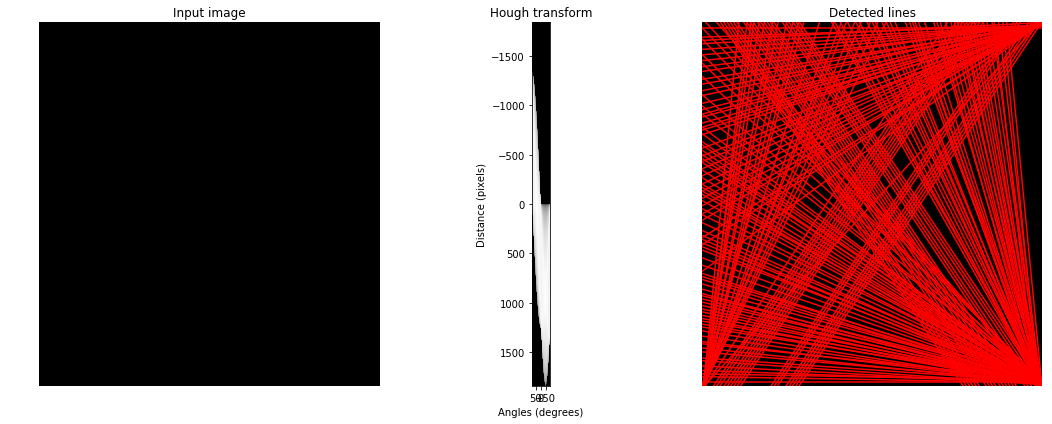

[42.73743016759776, -42.737430167597765, -43.74301675977654, -41.731843575419, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, 33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -33.687150837988824, -44.7486033519553, -45.75418994413408, -46.75977653631285, -47.76536312849162, -49.77653631284917, 

In [7]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

from pylab import imread, imshow, gray, mean

import matplotlib.pyplot as plt
from matplotlib import cm

image = imread('LQ2.png')
image = np.mean(image,axis=2)
image = (image < 128)*255

h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 3, figsize=(15, 6),
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()
ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

angle=[]
dist=[]
for _, a , d in zip(*hough_line_peaks(h, theta, d)):
    angle.append(a)
    dist.append(d)

angle = [a*180/np.pi for a in angle]
angle_reel = np.max(angle) - np.min(angle)

print(angle,angle_reel)
